# Implementing KNN on MNIST data set

###this code imports mnist data set and divide them into train and test samples  

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot

(train_X, train_y), (test_X, test_y) = mnist.load_data()
type(train_y)
#print(train_X[0])

11501568/11490434 [==============================] - 0s 0us/step


numpy.ndarray

###function to find euclidean distance between two images 

In [3]:
import math 

def euclideandistance(testdata , traindata ):
    distance = 0
    for x in range(28):
       for y in range(28):
         distance += pow((testdata[x][y] - traindata[x][y]),2)
    return math.sqrt(distance)

###function to determine nearest neighbours 

In [6]:
import operator

def getneighbours (trainset, test, k):
    distance = []
    for x in range(len(trainset)):
        dist = euclideandistance (test, trainset[x])
        distance.append((x,dist))
    distance.sort(key = operator.itemgetter(1))
    neighbours = []
    for x in range(k):
        neighbours.append(distance[x][0])
    return(neighbours)

mannn = getneighbours(train_X[0:600], test_X[1],3)

print(mannn)

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


[360, 400, 494]


###function to determine final result 

In [7]:
from collections import Counter

def result(neighbours): 
    digits = []
    for x in range(len(neighbours)):
        digits.append(train_y[neighbours[x]])
    c = Counter(digits) 
    d = c.most_common() 
    return((d[0][0]))

### function for accuracy

In [8]:
def accuracy ( testset, predicted):
    correct =0
    for x in range(len(testset)):
        if testset[x] == predicted[x]:
            correct += 1
        #print(repr(correct))
        #print(len(testset))
    return ((correct)/(len(testset))) * 100

###main

In [12]:
def main():
    predicted = []
    k = 5
    numberoftestcases = 10
    for x in range(601, 601 + numberoftestcases):
        neighbour = getneighbours(train_X[0:60], test_X[x], k)
        #print(neighbour)
        result1 = result(neighbour)
        #print('result = ' + repr(result1))
        predicted.append(result1)
        #print(predicted)
        print('predicted = ' + repr(result1) + ', actual = ' + repr(test_y[x]))
        #print(test_y[:1])
        #print(predicted)
    accuracy1 = accuracy(test_y[601:601 + numberoftestcases], predicted)
    print ('accuracy is = ' + repr(accuracy1))
main()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


predicted = 1, actual = 8
predicted = 0, actual = 6
predicted = 8, actual = 8
predicted = 8, actual = 5
predicted = 9, actual = 7
predicted = 8, actual = 8
predicted = 6, actual = 6
predicted = 0, actual = 0
predicted = 1, actual = 2
predicted = 0, actual = 4
accuracy is = 40.0


###classification rate function 

In [13]:
def classificationrate ( testset, predicted):
    correct =0
    for x in range(len(testset)):
        if testset[x] == predicted[x]:
            correct += 1
        #print(repr(correct))
        #print(len(testset))
    return ((correct)/(len(testset))) 

###run_knn function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


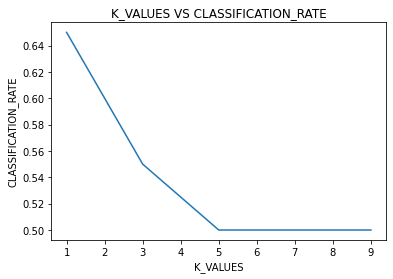

In [16]:
import matplotlib.pyplot as plt

def run_knn(numberoftestcase, numberoftrain):
    classification = [] 
    for k in [1,3,5,7,9]:
        predicted = []
        for x in range(601, 601+ numberoftestcase):
            neighbour = getneighbours(train_X[0:numberoftrain], test_X[x], k)
            result1 = result(neighbour)
            predicted.append(result1)
        classificationrate1 = classificationrate(test_y[601:601+numberoftestcase], predicted)
        classification.append(classificationrate1)
    plt.plot([1,3,5,7,9], classification)
    plt.xlabel('K_VALUES') 
    plt.ylabel('CLASSIFICATION_RATE')  
    plt.title('K_VALUES VS CLASSIFICATION_RATE') 
    return classification 
number_of_train = 600
for i in [number_of_train]:
    run_knn(20,i)
